# Análisis de Redes en *Python*
<br>
<img src="https://miro.medium.com/max/2978/1*rmq7bd3GFjcwfXtkrBQaPQ.png" alt="drawing" width="300"/>

## Software

NetworkX es un paquete Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

In [ ]:
#Installation
!conda install networkx

<img src="https://networkx.org/_static/networkx_logo.svg" alt="drawing" width="300"/>

In [26]:
import networkx as nx

NetworkX es un paquete muy completo que incluye entre otras cosas:

* Estructuras de datos para grafos, dígrafos y multigrafos
* Muchos algoritmos estándar
* Medidas de análisis
* Generadores de grafos clásicos, grafos aleatorios y redes sintéticas

NetworkX tiene distintas clases para distintos tipos
* Graph: No dirigido, simple
* DiGraph: Dirigido, simple
* MultiGraph: No dirigido, múltiples aristas paralelas
* MultiDiGraph: Dirigido, múltiples aristas

NetworkX es versátil por lo que: 

* Los nodos pueden ser "cualquier cosa" (por ejemplo, texto, imágenes, registros XML)
* Los aristas pueden contener datos arbitrarios (por ejemplo, pesos, series temporales)

## Primeros pasos

Existen varias maneras de representar y cargar en grafo a NetworkX, por el momento utilizaremos un grafo precargado en la librería.

In [29]:
karate = nx.karate_club_graph() #Cargar un grafo

*Zachary’s Karate Club* representa una red social de un club de karate universitario, 
descrito en el paper *An Information Flow Model for Conflict and Fission in Small Groups* de Wayne W. Zachary.

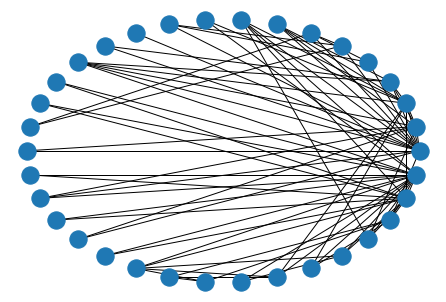

In [39]:
nx.draw_circular(karate) #Dibujar el grafo

### Analisis

Numero de Nodos y Aristas

In [42]:
print("\nNumNodes: "+str(karate.number_of_nodes()),"\nNumEdges: "+str(karate.number_of_edges()))


NumNodes: 34 
NumEdges: 78


#### Diámetro

In [13]:
nx.diameter(karate)

5

In [14]:
nx.radius(karate)

3

In [15]:
nx.eccentricity(karate)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [36]:
karate.degree(1)

9

### Centralidad

In [16]:
nx.degree_centrality(karate)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [17]:
nx.closeness_centrality(karate)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [18]:
nx.betweenness_centrality(karate)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [19]:
nx.pagerank(karate,alpha =0.9)

{0: 0.09923208031303203,
 1: 0.0543403155825792,
 2: 0.05919704684187155,
 3: 0.036612460562853694,
 4: 0.02129205163493875,
 5: 0.028358863602879276,
 6: 0.028358863602879276,
 7: 0.024777139411941047,
 8: 0.030411546757834793,
 9: 0.013746095283556584,
 10: 0.02129205163493875,
 11: 0.008523220243546811,
 12: 0.014015169158033743,
 13: 0.030254309009995452,
 14: 0.013916466828162465,
 15: 0.013916466828162465,
 16: 0.015703158296594022,
 17: 0.01395744128254017,
 18: 0.013916466828162465,
 19: 0.019434610880594574,
 20: 0.013916466828162465,
 21: 0.01395744128254017,
 22: 0.013916466828162465,
 23: 0.03165330491466868,
 24: 0.02045532726885293,
 25: 0.020410702877569672,
 26: 0.014276670024478019,
 27: 0.025579985022944167,
 28: 0.01938173195115044,
 29: 0.02603805549234405,
 30: 0.024824588072166538,
 31: 0.037572665335286734,
 32: 0.07330616298815512,
 33: 0.10345460652842152}

## Construyendo y analizando un grafo: Google Classroom

In [50]:
G = nx.MultiDiGraph() # Grafo dirigido multiple

In [51]:
G.add_nodes_from(["Marisol","Luis","Pablo","Daniel","Cesar","Cristian","Angelica","Samuel","Stephany","Rodrigo"])

In [52]:
G.add_edges_from([("Samuel","Marisol"),("Marisol","Samuel"),("Stephany","Luis"),("Angelica","Luis"),("Stephany","Luis"),("Rodrigo","Stephany"),("Rodrigo","Angelica"),("Stephany","Marisol"),("Luis","Stephany"),("Cristian","Marisol"),("Cristian","Stephany"),("Samuel","Marisol"),("Samuel","Marisol"),("Marisol","Samuel"),("Samuel","Marisol"),("Samuel","Marisol"),("Stephany","Marisol"),("Samuel","Stephany"),("Cristian","Samuel"),("Cristian","Samuel"),("Samuel","Cristian"),("Angelica","Marisol"),("Samuel","Marisol"),("Samuel","Luis"),("Samuel","Luis"),("Samuel","Luis"),("Samuel","Marisol"),("Angelica","Marisol"),("Stephany","Marisol"),("Marisol","Angelica"),("Marisol","Stephany")])

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 3,
 4,
 1,
 0,
 0,
 1,
 0,
 0,
 5,
 0,
 1,
 2,
 6,
 1,
 2,
 0,
 0]

In [53]:
import matplotlib.pyplot as plt

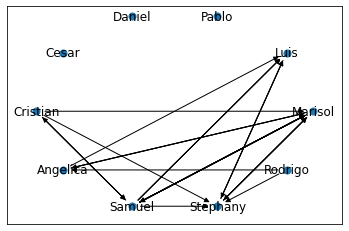

In [65]:
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=50)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [55]:
G.degree()

DiMultiDegreeView({'Marisol': 17, 'Luis': 7, 'Pablo': 0, 'Daniel': 0, 'Cesar': 0, 'Cristian': 5, 'Angelica': 5, 'Samuel': 16, 'Stephany': 10, 'Rodrigo': 2})